In [2]:
from statsbombpy import sb
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

In [3]:
sb.competitions()

/Users/atrix/opt/anaconda3/lib/python3.9/site-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2022-08-14T16:57:15.866765,2021-06-13T16:17:31.694,None,2022-08-14T16:57:15.866765
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,22,Europe,Champions League,male,False,False,2010/2011,2022-01-26T21:07:11.033473,2021-06-13T16:17:31.694,None,2022-01-26T21:07:11.033473
9,16,21,Europe,Champions League,male,False,False,2009/2010,2022-02-12T16:13:49.294747,2021-06-13T16:17:31.694,None,2022-02-12T16:13:49.294747


In [4]:
t=sb.matches(competition_id=55,season_id=43)

/Users/atrix/opt/anaconda3/lib/python3.9/site-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


In [5]:
df=sb.events(match_id=3795220)

/Users/atrix/opt/anaconda3/lib/python3.9/site-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


In [6]:
df.columns

Index(['ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_offensive', 'carry_end_location', 'clearance_aerial_won',
       'clearance_body_part', 'clearance_head', 'clearance_left_foot',
       'clearance_right_foot', 'counterpress', 'dribble_nutmeg',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_won_advantage', 'foul_won_defensive', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'injury_stoppage_in_chain', 'interception_outcome', 'location',
       'match_id', 'minute', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_deflected', 'pass_end_location',
       'pass_goal_assist', 'pass_height', 'pass_inswinging', 'pass_length',
       

In [7]:
df=df[df['team']=='Spain']

In [8]:
df=df[['type','minute','location','pass_end_location','player_id','player','pass_recipient','id','pass_outcome']]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3187 entries, 1 to 4823
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               3187 non-null   object 
 1   minute             3187 non-null   int64  
 2   location           3167 non-null   object 
 3   pass_end_location  946 non-null    object 
 4   player_id          3172 non-null   float64
 5   player             3172 non-null   object 
 6   pass_recipient     928 non-null    object 
 7   id                 3187 non-null   object 
 8   pass_outcome       113 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 249.0+ KB


In [10]:
subs=df[df['type']=='Substitution']

In [11]:
subs=subs['minute']

In [12]:
firstsub=subs.min()
firstsub

61

In [13]:
df=df[df['type']=='Pass']

In [14]:
df['pass_outcome'].fillna('Complete',inplace=True)

In [15]:
df=df[df['type']=='Pass']

In [16]:
df=df[df['pass_outcome']=='Complete']

In [17]:
df

,type,minute,location,pass_end_location,player_id,player,pass_recipient,id,pass_outcome
12,Pass,0,"[60.0, 40.0]","[37.1, 34.6]",16532.0,Daniel Olmo Carvajal,Aymeric Laporte,5ca9ecb5-21d1-42fd-afef-aa79929facae,Complete
13,Pass,0,"[35.8, 34.4]","[84.3, 74.4]",4353.0,Aymeric Laporte,Mikel Oyarzabal Ugarte,1523f029-3595-4228-9474-848a0f1052b7,Complete
16,Pass,0,"[43.5, 66.0]","[16.3, 41.6]",31953.0,Eric García Martret,Unai Simón Mendibil,613318e8-0614-4d34-ad20-b1a4325c46e9,Complete
17,Pass,0,"[16.3, 41.6]","[23.2, 18.3]",11748.0,Unai Simón Mendibil,Aymeric Laporte,2783a894-1ce0-42e6-a1d2-4e9f31d82eb6,Complete
18,Pass,0,"[30.4, 16.8]","[49.0, 32.4]",4353.0,Aymeric Laporte,Daniel Olmo Carvajal,713c0a17-f371-4935-b9c7-9fc9c0776781,Complete
...,...,...,...,...,...,...,...,...,...
1372,Pass,118,"[78.5, 61.1]","[65.1, 62.4]",6765.0,Rodrigo Hernández Cascante,Aymeric Laporte,f3916402-67e7-42aa-93da-07517a84aa1c,Complete
1373,Pass,118,"[64.0, 58.1]","[65.9, 40.4]",4353.0,Aymeric Laporte,Pau Francisco Torres,80fe105f-5256-4c83-92aa-83064cef6f41,Complete
1374,Pass,118,"[90.1, 30.8]","[98.6, 29.0]",6892.0,Pau Francisco Torres,Pedro González López,762dd6b6-324a-4772-90bc-0cae79910603,Complete
1377,Pass,119,"[76.4, 0.1]","[98.9, 7.0]",5211.0,Jordi Alba Ramos,Álvaro Borja Morata Martín,b5dd1bac-8e1b-42b2-bc9b-3a3b76cc6e26,Complete


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 833 entries, 12 to 1382
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               833 non-null    object 
 1   minute             833 non-null    int64  
 2   location           833 non-null    object 
 3   pass_end_location  833 non-null    object 
 4   player_id          833 non-null    float64
 5   player             833 non-null    object 
 6   pass_recipient     833 non-null    object 
 7   id                 833 non-null    object 
 8   pass_outcome       833 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 65.1+ KB


In [19]:
successful=df[df['minute']<firstsub]

In [20]:
successful

,type,minute,location,pass_end_location,player_id,player,pass_recipient,id,pass_outcome
12,Pass,0,"[60.0, 40.0]","[37.1, 34.6]",16532.0,Daniel Olmo Carvajal,Aymeric Laporte,5ca9ecb5-21d1-42fd-afef-aa79929facae,Complete
13,Pass,0,"[35.8, 34.4]","[84.3, 74.4]",4353.0,Aymeric Laporte,Mikel Oyarzabal Ugarte,1523f029-3595-4228-9474-848a0f1052b7,Complete
16,Pass,0,"[43.5, 66.0]","[16.3, 41.6]",31953.0,Eric García Martret,Unai Simón Mendibil,613318e8-0614-4d34-ad20-b1a4325c46e9,Complete
17,Pass,0,"[16.3, 41.6]","[23.2, 18.3]",11748.0,Unai Simón Mendibil,Aymeric Laporte,2783a894-1ce0-42e6-a1d2-4e9f31d82eb6,Complete
18,Pass,0,"[30.4, 16.8]","[49.0, 32.4]",4353.0,Aymeric Laporte,Daniel Olmo Carvajal,713c0a17-f371-4935-b9c7-9fc9c0776781,Complete
...,...,...,...,...,...,...,...,...,...
734,Pass,58,"[77.3, 59.4]","[74.9, 34.6]",31953.0,Eric García Martret,Aymeric Laporte,27feb094-f3b7-491a-a5fe-e9ebbbad1a6e,Complete
735,Pass,58,"[83.5, 31.0]","[89.2, 24.6]",4353.0,Aymeric Laporte,Pedro González López,b9fb68bc-ab12-4fce-8308-2da0c57734ea,Complete
736,Pass,58,"[88.8, 23.1]","[84.3, 29.0]",30486.0,Pedro González López,Aymeric Laporte,e4958239-58d0-408d-805e-e9947efa011c,Complete
737,Pass,58,"[88.6, 30.1]","[96.1, 38.5]",4353.0,Aymeric Laporte,Daniel Olmo Carvajal,cbcdbb4c-25a7-419e-a818-8421253f42fc,Complete


In [21]:
l=[]
for i in successful['location']:
    l.append(i[0])
successful['x']=l

/var/folders/4v/l4ntwqzn42l2mk9btrhkwcqm0000gn/T/ipykernel_11764/3797465833.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful['x']=l


In [22]:
l1=[]
for i in successful['location']:
    l1.append(i[1])
successful['y']=l1

/var/folders/4v/l4ntwqzn42l2mk9btrhkwcqm0000gn/T/ipykernel_11764/3132810158.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful['y']=l1


In [23]:
l3=[]
for i in successful['pass_end_location']:
    l3.append(i[0])
successful['x_final']=l3

/var/folders/4v/l4ntwqzn42l2mk9btrhkwcqm0000gn/T/ipykernel_11764/260152025.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful['x_final']=l3


In [24]:
l4=[]
for i in successful['pass_end_location']:
    l4.append(i[1])
successful['y_final']=l4

/var/folders/4v/l4ntwqzn42l2mk9btrhkwcqm0000gn/T/ipykernel_11764/4098569611.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful['y_final']=l4


In [25]:
successful

,type,minute,location,pass_end_location,player_id,player,pass_recipient,id,pass_outcome,x,y,x_final,y_final
12,Pass,0,"[60.0, 40.0]","[37.1, 34.6]",16532.0,Daniel Olmo Carvajal,Aymeric Laporte,5ca9ecb5-21d1-42fd-afef-aa79929facae,Complete,60.0,40.0,37.1,34.6
13,Pass,0,"[35.8, 34.4]","[84.3, 74.4]",4353.0,Aymeric Laporte,Mikel Oyarzabal Ugarte,1523f029-3595-4228-9474-848a0f1052b7,Complete,35.8,34.4,84.3,74.4
16,Pass,0,"[43.5, 66.0]","[16.3, 41.6]",31953.0,Eric García Martret,Unai Simón Mendibil,613318e8-0614-4d34-ad20-b1a4325c46e9,Complete,43.5,66.0,16.3,41.6
17,Pass,0,"[16.3, 41.6]","[23.2, 18.3]",11748.0,Unai Simón Mendibil,Aymeric Laporte,2783a894-1ce0-42e6-a1d2-4e9f31d82eb6,Complete,16.3,41.6,23.2,18.3
18,Pass,0,"[30.4, 16.8]","[49.0, 32.4]",4353.0,Aymeric Laporte,Daniel Olmo Carvajal,713c0a17-f371-4935-b9c7-9fc9c0776781,Complete,30.4,16.8,49.0,32.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,Pass,58,"[77.3, 59.4]","[74.9, 34.6]",31953.0,Eric García Martret,Aymeric Laporte,27feb094-f3b7-491a-a5fe-e9ebbbad1a6e,Complete,77.3,59.4,74.9,34.6
735,Pass,58,"[83.5, 31.0]","[89.2, 24.6]",4353.0,Aymeric Laporte,Pedro González López,b9fb68bc-ab12-4fce-8308-2da0c57734ea,Complete,83.5,31.0,89.2,24.6
736,Pass,58,"[88.8, 23.1]","[84.3, 29.0]",30486.0,Pedro González López,Aymeric Laporte,e4958239-58d0-408d-805e-e9947efa011c,Complete,88.8,23.1,84.3,29.0
737,Pass,58,"[88.6, 30.1]","[96.1, 38.5]",4353.0,Aymeric Laporte,Daniel Olmo Carvajal,cbcdbb4c-25a7-419e-a818-8421253f42fc,Complete,88.6,30.1,96.1,38.5


In [26]:
average_locations = successful.groupby('player').agg({'x':['mean'],'y':['mean','count']})

In [27]:
average_locations.columns=['x','y','count']

In [28]:
average_locations.head(11)

,x,y,count
player,,,
Aymeric Laporte,50.188525,23.608197,61
César Azpilicueta Tanco,60.186047,70.455814,43
Daniel Olmo Carvajal,65.772222,38.727778,18
Eric García Martret,48.455000,52.881667,60
Ferrán Torres García,83.970000,10.325000,20
Jordi Alba Ramos,62.680769,9.734615,52
Jorge Resurrección Merodio,67.754054,48.740541,37
Mikel Oyarzabal Ugarte,80.714286,60.166667,21
Pedro González López,71.913889,25.066667,36


In [29]:
successful.groupby(['player','pass_recipient']).head()

,type,minute,location,pass_end_location,player_id,player,pass_recipient,id,pass_outcome,x,y,x_final,y_final
12,Pass,0,"[60.0, 40.0]","[37.1, 34.6]",16532.0,Daniel Olmo Carvajal,Aymeric Laporte,5ca9ecb5-21d1-42fd-afef-aa79929facae,Complete,60.0,40.0,37.1,34.6
13,Pass,0,"[35.8, 34.4]","[84.3, 74.4]",4353.0,Aymeric Laporte,Mikel Oyarzabal Ugarte,1523f029-3595-4228-9474-848a0f1052b7,Complete,35.8,34.4,84.3,74.4
16,Pass,0,"[43.5, 66.0]","[16.3, 41.6]",31953.0,Eric García Martret,Unai Simón Mendibil,613318e8-0614-4d34-ad20-b1a4325c46e9,Complete,43.5,66.0,16.3,41.6
17,Pass,0,"[16.3, 41.6]","[23.2, 18.3]",11748.0,Unai Simón Mendibil,Aymeric Laporte,2783a894-1ce0-42e6-a1d2-4e9f31d82eb6,Complete,16.3,41.6,23.2,18.3
18,Pass,0,"[30.4, 16.8]","[49.0, 32.4]",4353.0,Aymeric Laporte,Daniel Olmo Carvajal,713c0a17-f371-4935-b9c7-9fc9c0776781,Complete,30.4,16.8,49.0,32.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,Pass,58,"[103.6, 7.2]","[97.8, 16.4]",6748.0,Ferrán Torres García,Pedro González López,40212ada-0099-4d98-911d-cb05cfafd4fc,Complete,103.6,7.2,97.8,16.4
729,Pass,58,"[76.8, 33.8]","[92.9, 53.9]",5203.0,Sergio Busquets i Burgos,Mikel Oyarzabal Ugarte,901cc3b4-e6a6-4b1c-a15d-1a73d6d0dfa7,Complete,76.8,33.8,92.9,53.9
735,Pass,58,"[83.5, 31.0]","[89.2, 24.6]",4353.0,Aymeric Laporte,Pedro González López,b9fb68bc-ab12-4fce-8308-2da0c57734ea,Complete,83.5,31.0,89.2,24.6
736,Pass,58,"[88.8, 23.1]","[84.3, 29.0]",30486.0,Pedro González López,Aymeric Laporte,e4958239-58d0-408d-805e-e9947efa011c,Complete,88.8,23.1,84.3,29.0


In [30]:
pass_between=successful.groupby(['player','pass_recipient']).id.count().reset_index()
pass_between.rename({'id':'pass_count'},axis='columns',inplace=True)

In [31]:
pass_between.head(50)

,player,pass_recipient,pass_count
0,Aymeric Laporte,César Azpilicueta Tanco,2
1,Aymeric Laporte,Daniel Olmo Carvajal,4
2,Aymeric Laporte,Eric García Martret,8
3,Aymeric Laporte,Ferrán Torres García,2
4,Aymeric Laporte,Jordi Alba Ramos,20
5,Aymeric Laporte,Jorge Resurrección Merodio,3
6,Aymeric Laporte,Mikel Oyarzabal Ugarte,2
7,Aymeric Laporte,Pedro González López,5
8,Aymeric Laporte,Sergio Busquets i Burgos,8
9,Aymeric Laporte,Unai Simón Mendibil,7


In [32]:
pass_between=pass_between.merge(average_locations, left_on ='player',right_index=True)
pass_between=pass_between.merge(average_locations, left_on ='pass_recipient',right_index=True)

In [33]:
pass_between.head(50)

,player,pass_recipient,pass_count,x_x,y_x,count_x,x_y,y_y,count_y
0,Aymeric Laporte,César Azpilicueta Tanco,2,50.188525,23.608197,61,60.186047,70.455814,43
17,Daniel Olmo Carvajal,César Azpilicueta Tanco,4,65.772222,38.727778,18,60.186047,70.455814,43
24,Eric García Martret,César Azpilicueta Tanco,13,48.455000,52.881667,60,60.186047,70.455814,43
48,Jorge Resurrección Merodio,César Azpilicueta Tanco,7,67.754054,48.740541,37,60.186047,70.455814,43
55,Mikel Oyarzabal Ugarte,César Azpilicueta Tanco,3,80.714286,60.166667,21,60.186047,70.455814,43
63,Pedro González López,César Azpilicueta Tanco,1,71.913889,25.066667,36,60.186047,70.455814,43
73,Sergio Busquets i Burgos,César Azpilicueta Tanco,6,58.432609,36.334783,46,60.186047,70.455814,43
83,Unai Simón Mendibil,César Azpilicueta Tanco,4,11.941667,37.375000,24,60.186047,70.455814,43
1,Aymeric Laporte,Daniel Olmo Carvajal,4,50.188525,23.608197,61,65.772222,38.727778,18
10,César Azpilicueta Tanco,Daniel Olmo Carvajal,2,60.186047,70.455814,43,65.772222,38.727778,18


In [34]:
pass_between=pass_between[pass_between['pass_count']>3]

In [35]:
from mplsoccer.pitch import Pitch

In [36]:
k=sb.lineups(match_id=3795220)['Spain']

In [37]:
k['player']=k['player_name']

In [38]:
k

,player_id,player_name,player_nickname,jersey_number,country,cards,positions,player
0,3333,David de Gea Quintana,David de Gea,1,Spain,[],[],David de Gea Quintana
1,3477,Álvaro Borja Morata Martín,Álvaro Morata,7,Spain,[],"[{'position_id': 23, 'position': 'Center Forwa...",Álvaro Borja Morata Martín
2,3957,César Azpilicueta Tanco,César Azpilicueta,2,Spain,[],"[{'position_id': 2, 'position': 'Right Back', ...",César Azpilicueta Tanco
3,4353,Aymeric Laporte,None,24,Spain,[],"[{'position_id': 5, 'position': 'Left Center B...",Aymeric Laporte
4,5199,Jorge Resurrección Merodio,Koke,8,Spain,[],"[{'position_id': 13, 'position': 'Right Center...",Jorge Resurrección Merodio
5,5203,Sergio Busquets i Burgos,Sergio Busquets,5,Spain,"[{'time': '50:16', 'card_type': 'Yellow Card',...","[{'position_id': 10, 'position': 'Center Defen...",Sergio Busquets i Burgos
6,5208,Thiago Alcântara do Nascimento,Thiago Alcântara,10,Spain,[],"[{'position_id': 10, 'position': 'Center Defen...",Thiago Alcântara do Nascimento
7,5211,Jordi Alba Ramos,Jordi Alba,18,Spain,[],"[{'position_id': 6, 'position': 'Left Back', '...",Jordi Alba Ramos
8,6596,José Luis Gayà Peña,José Gayá,14,Spain,[],[],José Luis Gayà Peña
9,6655,Fabián Ruiz Peña,Fabián Ruiz,17,Spain,[],[],Fabián Ruiz Peña


In [39]:
t=pd.merge(k,average_locations, how='outer', on=['player'])

In [40]:
t=t.drop('player_nickname',axis=1)

In [41]:
t.dropna(axis=0,inplace=True)

In [42]:
maxwidth=10
pass_between['width'] = (pass_between.pass_count / pass_between.pass_count.max() *maxwidth)
pass_between.head(20)

,player,pass_recipient,pass_count,x_x,y_x,count_x,x_y,y_y,count_y,width
17,Daniel Olmo Carvajal,César Azpilicueta Tanco,4,65.772222,38.727778,18,60.186047,70.455814,43,1.818182
24,Eric García Martret,César Azpilicueta Tanco,13,48.455000,52.881667,60,60.186047,70.455814,43,5.909091
48,Jorge Resurrección Merodio,César Azpilicueta Tanco,7,67.754054,48.740541,37,60.186047,70.455814,43,3.181818
73,Sergio Busquets i Burgos,César Azpilicueta Tanco,6,58.432609,36.334783,46,60.186047,70.455814,43,2.727273
83,Unai Simón Mendibil,César Azpilicueta Tanco,4,11.941667,37.375000,24,60.186047,70.455814,43,1.818182
1,Aymeric Laporte,Daniel Olmo Carvajal,4,50.188525,23.608197,61,65.772222,38.727778,18,1.818182
39,Jordi Alba Ramos,Daniel Olmo Carvajal,7,62.680769,9.734615,52,65.772222,38.727778,18,3.181818
49,Jorge Resurrección Merodio,Daniel Olmo Carvajal,4,67.754054,48.740541,37,65.772222,38.727778,18,1.818182
2,Aymeric Laporte,Eric García Martret,8,50.188525,23.608197,61,48.455000,52.881667,60,3.636364
11,César Azpilicueta Tanco,Eric García Martret,15,60.186047,70.455814,43,48.455000,52.881667,60,6.818182


In [43]:
d=t['count'].max()
maxsize=10
t['marksize']=(t['count']/d * maxsize)

In [44]:
t

,player_id,player_name,jersey_number,country,cards,positions,player,x,y,count,marksize
2,3957,César Azpilicueta Tanco,2,Spain,[],"[{'position_id': 2, 'position': 'Right Back', ...",César Azpilicueta Tanco,60.186047,70.455814,43.0,7.049180
3,4353,Aymeric Laporte,24,Spain,[],"[{'position_id': 5, 'position': 'Left Center B...",Aymeric Laporte,50.188525,23.608197,61.0,10.000000
4,5199,Jorge Resurrección Merodio,8,Spain,[],"[{'position_id': 13, 'position': 'Right Center...",Jorge Resurrección Merodio,67.754054,48.740541,37.0,6.065574
5,5203,Sergio Busquets i Burgos,5,Spain,"[{'time': '50:16', 'card_type': 'Yellow Card',...","[{'position_id': 10, 'position': 'Center Defen...",Sergio Busquets i Burgos,58.432609,36.334783,46.0,7.540984
7,5211,Jordi Alba Ramos,18,Spain,[],"[{'position_id': 6, 'position': 'Left Back', '...",Jordi Alba Ramos,62.680769,9.734615,52.0,8.524590
10,6685,Mikel Oyarzabal Ugarte,21,Spain,[],"[{'position_id': 17, 'position': 'Right Wing',...",Mikel Oyarzabal Ugarte,80.714286,60.166667,21.0,3.442623
12,6748,Ferrán Torres García,11,Spain,[],"[{'position_id': 21, 'position': 'Left Wing', ...",Ferrán Torres García,83.970000,10.325000,20.0,3.278689
19,11748,Unai Simón Mendibil,23,Spain,[],"[{'position_id': 1, 'position': 'Goalkeeper', ...",Unai Simón Mendibil,11.941667,37.375000,24.0,3.934426
20,16532,Daniel Olmo Carvajal,19,Spain,[],"[{'position_id': 23, 'position': 'Center Forwa...",Daniel Olmo Carvajal,65.772222,38.727778,18.0,2.950820
21,30486,Pedro González López,26,Spain,[],"[{'position_id': 15, 'position': 'Left Center ...",Pedro González López,71.913889,25.066667,36.0,5.901639


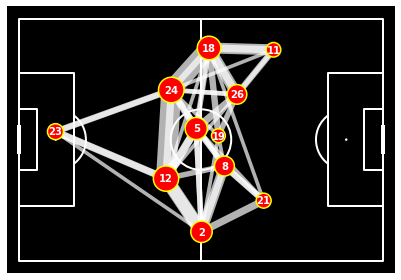

In [45]:
pitch=Pitch(pitch_color='black',line_color='white')
fig,ax = pitch.draw()
arrows=pitch.lines(pass_between.x_x,pass_between.y_x,pass_between.x_y,pass_between.y_y,ax=ax,linewidth=pass_between['width']*2,color='white',zorder=1,alpha=0.7)
nodes =pitch.scatter(t.x,t.y,s=65*t.marksize,color='red',edgecolor='yellow',linewidth=1.5,alpha=1,zorder=1,ax=ax)
for index, row in t.iterrows():
    pitch.annotate(row.jersey_number, xy=(row.x, row.y), c='white', va='center',
                   ha='center', size=10, weight='bold', ax=ax)